<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/brain_tumor_detect_0407_HJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! ls -lha /content/drive/MyDrive/kaggle.json

-rw------- 1 root root 62 Mar 22 00:26 /content/drive/MyDrive/kaggle.json


In [ ]:
#kaggle 폴더 생썽
! mkdir -p ~/.kaggle/

In [ ]:
#! cp/content/drive/MyDrive/Kaggle.json ~/.kaggle
! cp/content/drive/MyDrive/Kaggle.json

/bin/bash: cp/content/drive/MyDrive/Kaggle.json: No such file or directory


In [ ]:
! mkdir -p ~/.kaggle

! cp/content/drive/MyDrive/Kaggle.json ~/.kaggle

! chmod ~/.kaggle/kaggle.json

#파일 권한부여
! chmod

! kaggle competitions list

/bin/bash: cp/content/drive/MyDrive/Kaggle.json: No such file or directory
chmod: missing operand after ‘/root/.kaggle/kaggle.json’
Try 'chmod --help' for more information.
chmod: missing operand
Try 'chmod --help' for more information.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets download -d ahmedhamada0/brain-tumor-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#1차 data


In [ ]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#! unzip /content/archive.zip
! unzip archive.zip

Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123


In [ ]:
#vgg16
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import os
import tensorflow_hub as hub
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from numpy.random import seed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau
import imutils

In [ ]:
# vgg19
import os
import numpy as np
import cv2 
import imutils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
#파일 불러오기(yes)
data=[]
paths=[]
labels=[]
for r,d,f in os.walk("/content/drive/MyDrive/archive/brain_tumor_dataset/yes"):
    for file in f:
        if ".jpg" in file:
            paths.append(os.path.join(r,file))
for r,d,f in os.walk("/content/drive/MyDrive/archive/yes"):
    for file in f :
        if ".jpg" in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = np.array(img)


for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

In [ ]:
#파일 불러오기(no)
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/archive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for r, d, f in os.walk(r"/content/drive/MyDrive/archive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))


for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
data = np.array(data)
data.shape

(278, 128, 128, 3)

In [ ]:
# Define the path to the dataset
#IMG_PATH = '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/'
IMG_PATH = '/content/drive/MyDrive/archive/brain_tumor_dataset/'

# Create a list of all the image filenames
all_images = []
for folder in ['yes', 'no']:
    folder_path = os.path.join(IMG_PATH, folder)
    for filename in os.listdir(folder_path):
        
         all_images.append(os.path.join(folder_path, filename))

# Create a list of corresponding labels (0 for 'no', 1 for 'yes')
labels = [1 if 'Y' in filename else 0 for filename in all_images]

# Split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, labels, test_size=0.03, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=123)

# Print the sizes of the resulting datasets
print(f'Train set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Train set size: 183
Validation set size: 62
Test set size: 8


In [ ]:
from IPython.display import clear_output
!pip install imutils wandb
clear_output()

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

#feat. 하이퍼파라미터 최적화(HPO, Hyper parameter optimization)
#https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=ko

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,BatchNormalization, MaxPooling2D,Dropout,Flatten,Dense, Activation
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

sns.set_style('darkgrid')
%matplotlib inline
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

RANDOM_SEED = 101

In [ ]:
!apt-get install tree
clear_output()
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

.
├── drive
│   └── MyDrive
│       ├── 1주차_Feedback
│       ├── 2020_CV
│       ├── 2주차
│       │   └── 2주차_Feedback
│       ├── all
│       │   └── DS_7 28실습
│       ├── appsheet
│       │   └── data
│       │       └── CustomerContacts-4659903
│       ├── archive
│       │   ├── brain_tumor_dataset
│       │   │   ├── no
│       │   │   └── yes
│       │   ├── no
│       │   └── yes
│       ├── Colab Notebooks
│       ├── data
│       │   ├── brain
│       │   │   ├── test
│       │   │   └── train
│       │   │       ├── ad
│       │   │       └── normal
│       │   ├── car_detect_data
│       │   │   ├── testing_images
│       │   │   └── training_images
│       │   └── titanic
│       ├── KAIST_TLO
│       │   └── 시장조사
│       ├── SyncPlatformBackups
│       ├── UX
│       └── 원서
├── sample_data
├── TEST
│   ├── NO
│   └── YES
├── TRAIN
│   ├── NO
│   └── YES
└── VAL
    ├── NO
    └── YES

43 directories


In [ ]:
def load_data(dir_path, img_size=(100,100)):
    X = []
    y = []
    i=0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (180,180)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _  = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|██████████| 2/2 [00:00<00:00, 4928.68it/s]


0 images loaded from TRAIN/ directory.


100%|██████████| 2/2 [00:00<00:00, 11699.59it/s]


0 images loaded from TEST/ directory.


100%|██████████| 2/2 [00:00<00:00, 15679.64it/s]

0 images loaded from VAL/ directory.


In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name==0))
    y[1].append(np.sum(set_name==1))
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7)

data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title':'Set'},
    yaxis={'title':'Count'}
)
fig = go.Figure(data,layout)
iplot(fig)

In [ ]:
def plot_samples(X,y,labels_dict, n=50):
    """
        Create a gridplot for desired number of images (n) from specified set
    """ 
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y==index)][:n]
        j = 10
        i = int(n/j)
        
        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])
            
            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()


As you can see, images have different width and height and diffent size of "black corners". Since the image size for VGG-16 input layer is (224,224) some wide images may look weird after resizing. Histogram of ratio distributions (ratio = width/height):

In [ ]:
plot_samples(X_train, y_train, labels, 30)

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [ ]:
!rm -rf preview/


In [ ]:
IMG_SIZE

(180, 180)

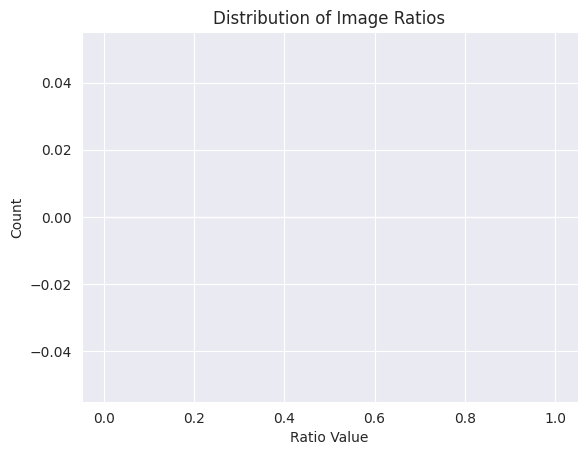

In [ ]:

RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show();

In [ ]:


import cv2
img = cv2.imread('/content/drive/MyDrive/archive/no/1 no.jpeg')
img1 = cv2.imread('/content/drive/MyDrive/archive/no/No20.jpg')
img2 = cv2.imread('/content/drive/MyDrive/archive/no/no 92.jpg')
img3 = cv2.imread('/content/drive/MyDrive/archive/yes/Y100.JPG')
img4 = cv2.imread('/content/drive/MyDrive/archive/yes/Y11.JPG')
img5 = cv2.imread('/content/drive/MyDrive/archive/yes/Y155.JPG')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)


plt.imshow(img)
f, axarr = plt.subplots(2,3)
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(img1, cmap='gray')
axarr[2].imshow(img2, cmap='gray')
axarr[3].imshow(img3, cmap='gray')
axarr[4].imshow(img4, cmap='gray')
axarr[5].imshow(img5, cmap='gray')


error: ignored

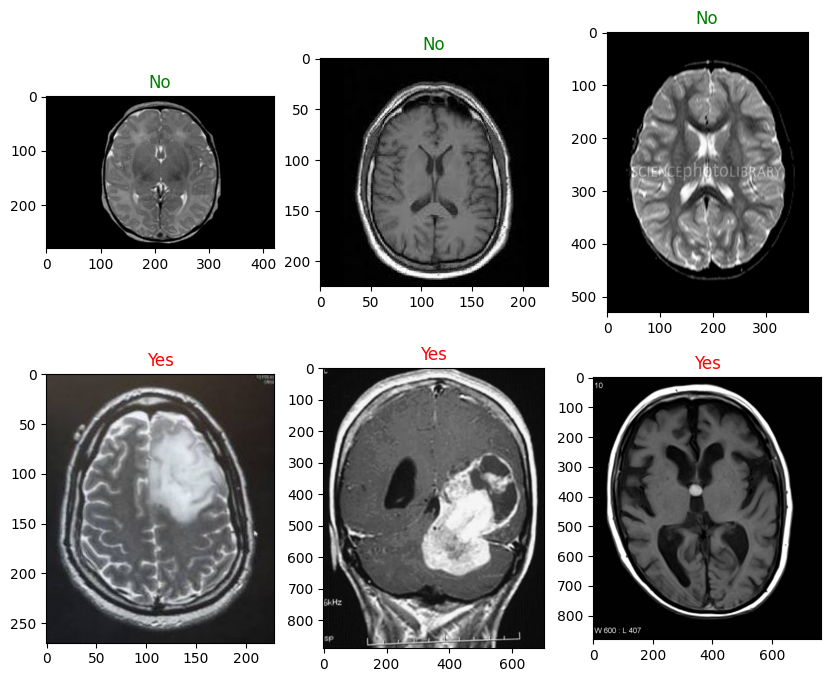

In [ ]:
# Define the path to the dataset
#IMG_PATH = '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/'
IMG_PATH = '/content/drive/MyDrive/archive/brain_tumor_dataset/'

# Define the labels and their corresponding colors
labels = {0: 'No', 1: 'Yes'}
colors = {0: 'green', 1: 'red'}

# Plot some images from the train set for each label
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
for i, label in enumerate([0, 1]):
    images = [x for x, y in zip(X_train, y_train) if y == label][:3]
    for j, image_path in enumerate(images):
        img = plt.imread(image_path)
        axs[i, j].imshow(img)
        axs[i, j].set_title(labels[label], color=colors[label])
plt.show()

In [ ]:
img = cv2.imread('y0.jpg')
img1 = cv2.imread('y1.jpg')
img2 = cv2.imread('y2.jpg')
#plt.imshow(img)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img)
axarr[1].imshow(img1)
axarr[2].imshow(img2)

In [ ]:
def preprocess_images(images):
    preprocessed_images = []
    for i, img_path in enumerate(images):
        img = cv2.imread(img_path)
        img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        
        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # crop
        ADD_PIXELS = 0
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        new_img = cv2.resize(
            new_img,
            dsize=(224,224))
        preprocessed_images.append(new_img)
    return np.array(preprocessed_images)

In [ ]:
# Apply the preprocessing to all the data subsets 
X_train_pre = preprocess_images(X_train)
X_val_pre = preprocess_images(X_val)
X_test_pre = preprocess_images(X_test)

In [ ]:
# Transform the subsets to numpy arrays 
X_train_pre_vgg = np.array([preprocess_input(image) for image in X_train_pre])
X_val_pre_vgg = np.array([preprocess_input(image) for image in X_val_pre])
X_test_pre_vgg = np.array([preprocess_input(image) for image in X_test_pre])

NameError: ignored

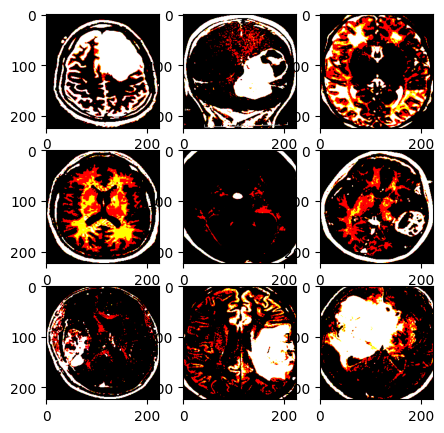

In [ ]:
# plot some images from X_train_pre
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_pre_vgg[i], cmap='gray')
plt.show()

In [ ]:
#vgg19보다 16이 성능이 잘 나옴
model_vgg16=VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))


In [ ]:
model = keras.Sequential([
    model_vgg16,
    layers.Flatten(),
    layers.Dropout(0.2), # 데이터셋이 적기때문에 과적합을 우려하여 노드를 독립적인확률(75%)로 활성화시켜학습. #0.2로 변경
    layers.Dense(units=256, activation="relu"), #units : 256 , activation : relu
    layers.BatchNormalization(),
    layers.Dense(units=1, activation="sigmoid") #0,1로 반환하기 위해 sigmoid사용
])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', #validation accuracy 를 정지 지표로사용
    min_delta = 0, #개선된 것으로 간주하기 위한 최소한의 변화량
    patience=5, #최적의 monitor 값을 기준으로 몇 번의 epoch을 진행할 지 정하는 값
    verbose=1, #만약 earlystopping되면 알림
    mode='max', #과적합이 일어났을 때validation accuracy가 떨어지는것을 상정하고 validatioin accuracy가 최대가 되어야한다 지정
)

In [ ]:
#call back hj
cp = keras.callbacks.ModelCheckpoint('cifar_dnn_model.h5', save_best_only = True)
es = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history = model.fit(train_scaled,
                    train_oh,
                    epochs=50,
                    batch_size= 32,
                    validation_data=(test_scaled, test_oh),
                    callbacks=[cp, es])

In [ ]:
model.evaluate(test_scaled, test_oh)


In [ ]:
#confusion matrix 
# Make predictions on X_test_pre
y_pred = model.predict(X_test_pre)
y_pred = np.round(y_pred).astype(int)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_accuracy)

In [ ]:
#vgg16 모델 불러오기
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(400, 300, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

#vgg16 밑에 레이어 추가
additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(12, activation='softmax'))

additional_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
"""# Load the pre-trained VGG19 model
base_model = VGG19(
weights='imagenet',
include_top=False,
input_shape=(224,224) + (3,)
)"""

#
base_model = VGG16(
weights='imagenet',
include_top=False,
input_shape=(224,224) + (3,)
)

# Create a new model by adding a few layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained model
model.layers[0].trainable = False

# Compile the model with appropriate loss function, optimizer and metrics
model.compile(
loss='binary_crossentropy',
optimizer=Adam(),
metrics=['accuracy']
)

# Print the summary of the model
model.summary()

# Define the training data generator with necessary data augmentation techniques
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

# Create the training data generator using the training dataset and the data generator
train_generator = train_datagen.flow(
X_train_pre_vgg,
y_train,
batch_size=32
)

# Define a callback to reduce the learning rate when the validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-5)

# Define a callback to stop the training when validation accuracy reaches 90%
class StopOnAccuracy(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print("\nReached 90% accuracy, stopping training...")
            self.model.stop_training = True

# Define the validation data generator with appropriate data preprocessing
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the validation data generator using the validation dataset and the data generator
val_generator = val_datagen.flow(X_val_pre_vgg, y_val, batch_size=18)

# Train the model using the training data generator, validation data generator and the defined callbacks
history = model.fit(
train_generator,
epochs=50,
validation_data=val_generator,
callbacks=[reduce_lr,StopOnAccuracy()]
)


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


NameError: ignored

In [ ]:
#model시각화 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on X_test_pre
y_pred = model.predict(X_test_pre)
y_pred = np.round(y_pred).astype(int)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_accuracy)

In [ ]:
f, axarr = plt.subplots(1,5)

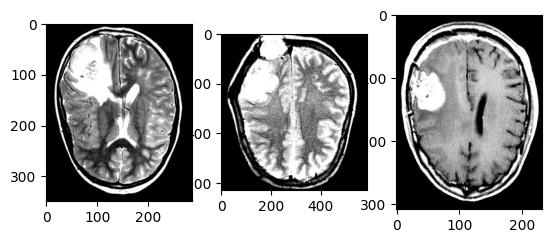

In [ ]:
img = cv2.imread('y0.jpg')
img1 = cv2.imread('y1.jpg')
img2 = cv2.imread('y2.jpg')
#plt.imshow(img)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img)
axarr[1].imshow(img1)
axarr[2].imshow(img2)

In [ ]:
print(img.shape)
print(img1.shape)
print(img2.shape)

(348, 287, 3)
(630, 587, 3)
(309, 232, 3)


In [ ]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
labels=np.array(labels)
labels=labels.reshape(278,1)
print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (278, 128, 128, 3)
labels shape is: (278, 1)


In [ ]:
print(np.max(data))
print(np.min(data))

255
0


In [ ]:
data=data/255.00
print(np.max(data))
print(np.min(data))

1.0
0.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,
                                                 labels,
                                                 test_size=0.2,             #traing 80% test 20%를 데이터셋으로활용.
                                                 shuffle = True,            #split 전 섞기
                                                 random_state = 8)          #데이터셋변환방지

In [ ]:
base_model=VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))

58889256/58889256 [==============================] - 0s 0us/step
